## Module 1 Homework (2025 cohort)

In this homework, we're going to download finance data from various sources and make simple calculations or analysis.

---
### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.


##### Question 1. Which year had the highest number of additions to the S&P 500 index? (2 points)

* **2017**
* ~~2019~~
* ~~2008~~
* ~~2023~~

In [50]:
import io

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

import sklearn
import sklearn.metrics

import yfinance

In [11]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [13]:
type(dfs), len(dfs)

(list, 2)

In [14]:
dfs[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [15]:
dfs[1]

Date  Added                                Removed  \
                   Date Ticker                       Security  Ticker   
0          May 19, 2025   COIN                       Coinbase     DFS   
1        March 24, 2025   DASH                       DoorDash     BWA   
2        March 24, 2025    TKO             TKO Group Holdings     TFX   
3        March 24, 2025    WSM          Williams-Sonoma, Inc.      CE   
4        March 24, 2025    EXE                  Expand Energy     FMC   
..                  ...    ...                            ...     ...   
367   December 11, 1998   CPWR                      Compuware     SUN   
368       June 17, 1997    CCI  Countrywide Credit Industries     USL   
369  September 30, 1994    NCC                  National City     MCK   
370        July 1, 1976    BUD                 Anheuser Busch     HNG   
371        July 1, 1976    DIS        The Walt Disney Company     AYE   

                                                                     Reason  
                Security                                             Reason  
0     Discover Financial  S&P 500 constituent Capital One Financial Corp...  
1             BorgWarner                   Market capitalization change.[5]  
2               Teleflex                   Market capitalization change.[5]  
3               Celanese                   Market capitalization change.[5]  
4        FMC Corporation                   Market capitalization change.[5]  
..                   ...                                                ...  
367           SunAmerica                     AIG purchased SunAmerica.[262]  
368               USLife                          AIG acquired USLife.[263]  
369             McKesson  McKesson sold PCS Health Services to Eli Lilly...  
370  Houston Natural Gas  Major restructuring of S&P 500 to have fewer i...  
371     Allegheny Energy  Major restructuring of S&P 500 to have fewer i...  

[372 rows x 6 columns]

In [17]:
dfs[0]['Year_added'] = dfs[0]['Date added'].apply(lambda s: pd.to_datetime(s).year)
dfs[0].head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Year_added
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,2017
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1957
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2012
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,2011


In [28]:
dfs[0]['Year_added'].value_counts().head(10)

Year_added
1957    53
2016    23
2017    23
2019    22
2008    17
2022    16
2024    16
2023    15
2021    15
2012    14
Name: count, dtype: int64

In [29]:
tdf = dfs[0].groupby('Year_added').agg(['count', lambda s: list(s)])['Symbol'].sort_values('count', ascending=False)
tdf.head(10)

,count,<lambda_0>
Year_added,,
1957,53,"[MMM, ABT, MO, AEP, ADM, BA, BMY, CPB, CAT, CV..."
2017,23,"[AOS, AMD, ARE, ALGN, ANSS, BKR, CDNS, CBOE, E..."
2016,23,"[ALB, LNT, AWK, AJG, CNC, CHTR, CFG, COO, DLR,..."
2019,22,"[AMCR, ATO, CDW, CTVA, DOW, DD, FOXA, FOX, IEX..."
2008,17,"[APH, CF, CTRA, DVA, FAST, DOC, ISRG, IVZ, LHX..."
2024,16,"[APO, CRWD, DECK, DELL, ERIE, GEV, GDDY, KKR, ..."
2022,16,"[ACGL, CPT, CEG, CSGP, EQT, FSLR, INVH, KDP, M..."
2023,15,"[ABNB, AXON, BX, BLDR, BG, FICO, GEHC, HUBB, P..."
2021,15,"[TECH, BRO, CZR, CRL, DAY, ENPH, EPAM, FDS, GN..."


##### **A:** According to the analysis of data from Wikipedia, it turns out that the maximum number of companies added to the SP 500 index occurred in 2016 and 2017 (25 companies each).

In [51]:
len(dfs[0])

503

In [58]:
list_20years_companies = dfs[0][2025-dfs[0]['Year_added']>20].Symbol.to_list()

print(list_20years_companies)
print()
print(f"{len(list_20years_companies) = }")

['MMM', 'ABT', 'ADBE', 'AES', 'AFL', 'A', 'APD', 'ALL', 'MO', 'AEE', 'AEP', 'AXP', 'AIG', 'AMGN', 'ADI', 'AON', 'APA', 'AAPL', 'AMAT', 'ADM', 'T', 'ADSK', 'ADP', 'AZO', 'AVY', 'BALL', 'BAC', 'BAX', 'BDX', 'BBY', 'BIIB', 'BK', 'BA', 'BSX', 'BMY', 'BF.B', 'CPB', 'COF', 'CAH', 'CCL', 'CAT', 'COR', 'CNP', 'SCHW', 'CVX', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CLX', 'CMS', 'KO', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'GLW', 'COST', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DE', 'DVN', 'DOV', 'DTE', 'DUK', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EA', 'ELV', 'EMR', 'ETR', 'EOG', 'EFX', 'EQR', 'EXC', 'XOM', 'FDX', 'FITB', 'FE', 'FI', 'F', 'BEN', 'GE', 'GEN', 'GD', 'GIS', 'GPC', 'GILD', 'GL', 'GS', 'HAL', 'HIG', 'HAS', 'HSY', 'HES', 'HD', 'HON', 'HPQ', 'HBAN', 'IBM', 'ITW', 'INTC', 'IFF', 'IP', 'IPG', 'INTU', 'JNJ', 'JPM', 'K', 'KEY', 'KMB', 'KLAC', 'KR', 'LH', 'LLY', 'LIN', 'LMT', 'L', 'LOW', 'MTB', 'MAR', 'MMC', 'MAS', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MU', 'MSFT', 'TAP', 'MCO', 'MS', 'MSI', 'NTAP', 

**The SP500 index includes 219 of 503 companies that are more than 20 years old.**

### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)

##### Question 2. How many indexes have better year-to-date returns than the US S&P500 as of May 1, 2025? (3 points)

* ~~5~~
* ~~7~~
* **9**
* ~~8~~

In [63]:
str_world_indices = """
United States - S&P 500 (^GSPC)
China - Shanghai Composite (000001.SS)
Hong Kong - HANG SENG INDEX (^HSI)
Australia - S&P/ASX 200 (^AXJO)
India - Nifty 50 (^NSEI)
Canada - S&P/TSX Composite (^GSPTSE)
Germany - DAX (^GDAXI)
United Kingdom - FTSE 100 (^FTSE)
Japan - Nikkei 225 (^N225)
Mexico - IPC Mexico (^MXX)
Brazil - Ibovespa (^BVSP)
"""

In [64]:
import io

In [68]:
tdf = pd.read_csv(io.StringIO(str_world_indices.replace('(',',').replace(')','')), names=['index_name', 'index_ticker'])
tdf

,index_name,index_ticker
0,United States - S&P 500,^GSPC
1,China - Shanghai Composite,000001.SS
2,Hong Kong - HANG SENG INDEX,^HSI
3,Australia - S&P/ASX 200,^AXJO
4,India - Nifty 50,^NSEI
5,Canada - S&P/TSX Composite,^GSPTSE
6,Germany - DAX,^GDAXI
7,United Kingdom - FTSE 100,^FTSE
8,Japan - Nikkei 225,^N225
9,Mexico - IPC Mexico,^MXX


In [70]:
dict_world_indices = tdf.set_index('index_ticker').to_dict()['index_name']
dict_world_indices

{'^GSPC': 'United States - S&P 500 ',
 '000001.SS': 'China - Shanghai Composite ',
 '^HSI': 'Hong Kong - HANG SENG INDEX ',
 '^AXJO': 'Australia - S&P/ASX 200 ',
 '^NSEI': 'India - Nifty 50 ',
 '^GSPTSE': 'Canada - S&P/TSX Composite ',
 '^GDAXI': 'Germany - DAX ',
 '^FTSE': 'United Kingdom - FTSE 100 ',
 '^N225': 'Japan - Nikkei 225 ',
 '^MXX': 'Mexico - IPC Mexico ',
 '^BVSP': 'Brazil - Ibovespa '}

In [80]:
data = dict()

for t in list(dict_world_indices.keys()):
    print(f"Downloading data for ticker {t}...", end='')
    ticker = yfinance.Ticker(t)
    data[t] = ticker.history(start='2025-01-01', end='2025-05-01' )  
    print(' Ok.')

In [84]:
len(data), data.keys()

(11,
 dict_keys(['^GSPC', '000001.SS', '^HSI', '^AXJO', '^NSEI', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^MXX', '^BVSP']))

In [113]:
# for t in data.keys():
#     display(t)
#     display(data[t].head(3))

Text(0, 0.5, 'YTD Percent Price Change')

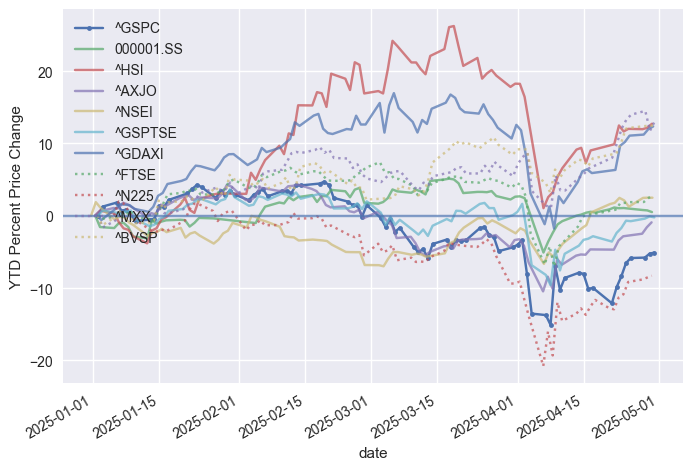

In [109]:
ax = None 

for i, t in enumerate(data.keys()):
    if i==0: style='.-'; alpha = 1
    else: style='-'; alpha=0.7
    if i>=7: style=':'
        
    ytd_percent_change = (data[t]['Close'] - data[t]['Close'].iloc[0]) / data[t]['Close'].iloc[0] * 100
    ax = ytd_percent_change.plot(label=t, style=style,  alpha=alpha, ax=ax)

xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1], alpha=0.7)
plt.xlim(*xlim)

plt.legend(loc='upper left')

plt.xlabel('date')
plt.ylabel('YTD Percent Price Change')

In [115]:
ytd_returns = dict()

for i, t in enumerate(data.keys()):
    ytd_percent_change = (data[t]['Close'] - data[t]['Close'].iloc[0]) / data[t]['Close'].iloc[0] * 100
    ytd_returns[t] = ytd_percent_change.iloc[-1]

In [116]:
ytd_returns

{'^GSPC': -5.10330074824504,
 '000001.SS': 0.5048172440500021,
 '^HSI': 12.720017835921466,
 '^AXJO': -0.9145002952478493,
 '^NSEI': 2.4904237409784913,
 '^GSPTSE': -0.22612571792915093,
 '^GDAXI': 12.34637838149953,
 '^FTSE': 2.8425901908435485,
 '^N225': -8.297930804200304,
 '^MXX': 13.049444457570319,
 '^BVSP': 12.438709677419354}

In [120]:
pd.Series(ytd_returns).sort_values(ascending=False)

^MXX         13.049444
^HSI         12.720018
^BVSP        12.438710
^GDAXI       12.346378
^FTSE         2.842590
^NSEI         2.490424
000001.SS     0.504817
^GSPTSE      -0.226126
^AXJO        -0.914500
^GSPC        -5.103301
^N225        -8.297931
dtype: float64

In [121]:
sum( pd.Series(ytd_returns) > pd.Series(ytd_returns)['^GSPC'] )

9

##### **A:** As of May 1, YTD percentage returns are higher than ^GSPC for almost all of the world indices considered, except ^N225 (9 out of 10)

In [177]:
data = dict()

for t in list(dict_world_indices.keys()):
    print(f"Downloading data for ticker {t}...", end='')
    ticker = yfinance.Ticker(t)
    data[t] = ticker.history(start='2015-01-01', end='2025-05-01' )  
    print(' Ok.')

 Ok.loading data for ticker ^FTSE...


In [127]:
display(data[list(data.keys())[0]].head())
display(data[list(data.keys())[0]].tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,0.0,0.0
2015-01-05 00:00:00-05:00,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,0.0,0.0
2015-01-06 00:00:00-05:00,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,0.0,0.0
2015-01-07 00:00:00-05:00,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,0.0,0.0
2015-01-08 00:00:00-05:00,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,0.0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-24 00:00:00-04:00,5381.379883,5489.399902,5371.959961,5484.770020,4697710000,0.0,0.0
2025-04-25 00:00:00-04:00,5489.729980,5528.109863,5455.859863,5525.209961,4236580000,0.0,0.0
2025-04-28 00:00:00-04:00,5529.220215,5553.660156,5468.640137,5528.750000,4257880000,0.0,0.0
2025-04-29 00:00:00-04:00,5508.870117,5571.950195,5505.700195,5560.830078,4747150000,0.0,0.0
2025-04-30 00:00:00-04:00,5499.439941,5581.839844,5433.240234,5569.060059,5449490000,0.0,0.0


In [150]:
data[t]['Close'][data[t]['Close'].index >= pd.to_datetime('2025-01-08', utc='True')].iloc[[0]]

Date
2025-01-08 00:00:00-03:00    119625.0
Name: Close, dtype: float64

In [168]:
for i in [0, 3, 5, 10]:
    print(f"{i} years ago:")
    mask = data[t]['Close'].index >= pd.to_datetime('2025-01-01', utc='True') - pd.to_timedelta(f'{i*365.5} days')
    #print(start_date)
    print(data[t]['Close'][mask].iloc[[0]])
    print()

0 years ago:
Date
2025-01-02 00:00:00-03:00    120125.0
Name: Close, dtype: float64

3 years ago:
Date
2022-01-03 00:00:00-03:00    103922.0
Name: Close, dtype: float64

5 years ago:
Date
2020-01-02 00:00:00-03:00    118573.0
Name: Close, dtype: float64

10 years ago:
Date
2015-01-02 00:00:00-02:00    48512.0
Name: Close, dtype: float64



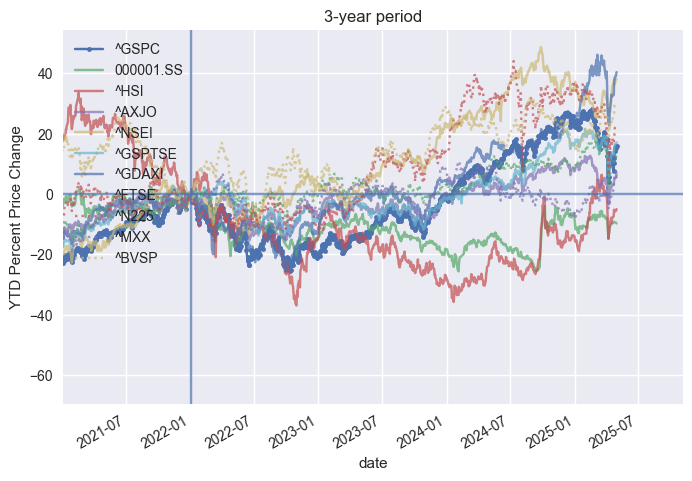

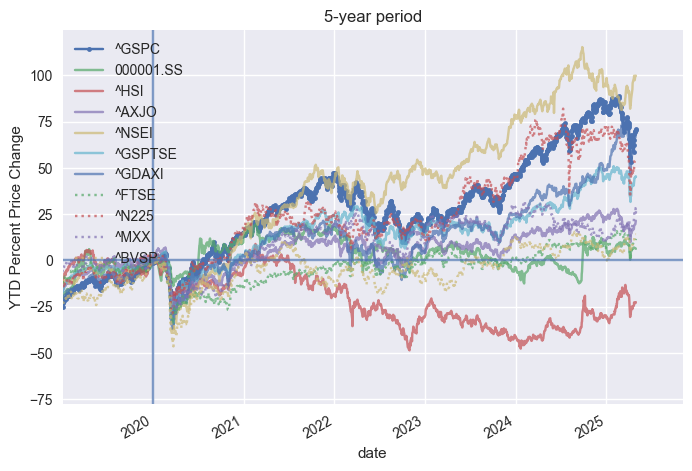

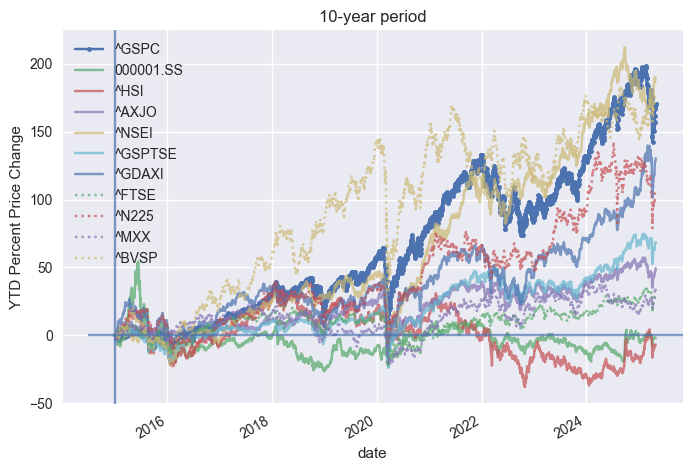

In [176]:
for period in [3, 5, 10]:

    ax = None 
    plt.figure()
    
    for i, t in enumerate(data.keys()):
        if i==0: style='.-'; alpha = 1
        else: style='-'; alpha=0.7
        if i>=7: style=':'

        mask = data[t]['Close'].index >= pd.to_datetime('2025-01-01', utc='True') - pd.to_timedelta(f'{period*365.5} days')
        start_Close = data[t]['Close'][mask].iloc[0]
        start_date = data[t]['Close'][mask].iloc[[0]].index
        
        ytd_percent_change = (data[t]['Close'] - start_Close) / start_Close * 100
        ax = ytd_percent_change.plot(label=t, style=style,  alpha=alpha, ax=ax)
    
    xlim = plt.xlim()
    plt.hlines(0, xlim[0], xlim[1], alpha=0.7)
    plt.xlim(*xlim)

    ylim = plt.ylim()
    plt.vlines(start_date, ylim[0], ylim[1], alpha=0.7)
    plt.ylim(*ylim)
    
    plt.legend(loc='upper left')
    
    plt.xlabel('date')
    plt.ylabel('YTD Percent Price Change')

    plt.xlim([start_date - pd.to_timedelta('365 days'), xlim[1]])

    plt.title(f'{period}-year period')

##### **A:** On the 5- and 10-year periods, the US index outperforms the indices of almost all other countries. And on the 3-year period, it is already approximately in the middle of the list of world indices by relative profitability.

### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:* 
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days


##### Question 3. Median duration (in days) of significant market corrections in the S&P 500 index (3 points)

* **39**
* ~~113~~
* ~~95~~
* ~~74~~

In [230]:
str_durations = """
2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days
"""

In [235]:
df_durations = pd.read_table(io.StringIO(str_durations), sep=' ', header=None)
df_durations = df_durations.drop(columns=[1,4,5,7])
df_durations.columns = ['from', 'to', 'drop_perc', 'duration_days']

df_durations

,from,to,drop_perc,duration_days
0,2007-10-09,2009-03-09:,56.8%,517
1,2000-03-24,2002-10-09:,49.1%,929
2,1973-01-11,1974-10-03:,48.2%,630
3,1968-11-29,1970-05-26:,36.1%,543
4,2020-02-19,2020-03-23:,33.9%,33
5,1987-08-25,1987-12-04:,33.5%,101
6,1961-12-12,1962-06-26:,28.0%,196
7,1980-11-28,1982-08-12:,27.1%,622
8,2022-01-03,2022-10-12:,25.4%,282
9,1966-02-09,1966-10-07:,22.2%,240


In [193]:
data = dict()

for t in [list(dict_world_indices.keys())[0]]:
    print(f"Downloading data for ticker {t}...", end='')
    ticker = yfinance.Ticker(t)
    data[t] = ticker.history( start='1950-01-01', end='2025-05-01' )  
    print(' Ok.')

In [191]:
data.keys()

dict_keys(['^GSPC'])

In [194]:
display(data['^GSPC'].head())
display(data['^GSPC'].tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.66,16.66,16.66,16.66,1260000,0.0,0.0
1950-01-04 00:00:00-05:00,16.85,16.85,16.85,16.85,1890000,0.0,0.0
1950-01-05 00:00:00-05:00,16.93,16.93,16.93,16.93,2550000,0.0,0.0
1950-01-06 00:00:00-05:00,16.98,16.98,16.98,16.98,2010000,0.0,0.0
1950-01-09 00:00:00-05:00,17.08,17.08,17.08,17.08,2520000,0.0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-24 00:00:00-04:00,5381.379883,5489.399902,5371.959961,5484.770020,4697710000,0.0,0.0
2025-04-25 00:00:00-04:00,5489.729980,5528.109863,5455.859863,5525.209961,4236580000,0.0,0.0
2025-04-28 00:00:00-04:00,5529.220215,5553.660156,5468.640137,5528.750000,4257880000,0.0,0.0
2025-04-29 00:00:00-04:00,5508.870117,5571.950195,5505.700195,5560.830078,4747150000,0.0,0.0
2025-04-30 00:00:00-04:00,5499.439941,5581.839844,5433.240234,5569.060059,5449490000,0.0,0.0


In [214]:
df = data['^GSPC'][['Close']]

In [216]:
%%capture

df['All_Time_High'] = df['Close'].cummax()
df['Is_ATH'] = (df['Close'] == df['All_Time_High'])

In [221]:
df.head()

,Close,All_Time_High,Is_ATH
Date,,,
1950-01-03 00:00:00-05:00,16.66,16.66,True
1950-01-04 00:00:00-05:00,16.85,16.85,True
1950-01-05 00:00:00-05:00,16.93,16.93,True
1950-01-06 00:00:00-05:00,16.98,16.98,True
1950-01-09 00:00:00-05:00,17.08,17.08,True


<Axes: xlabel='Date'>

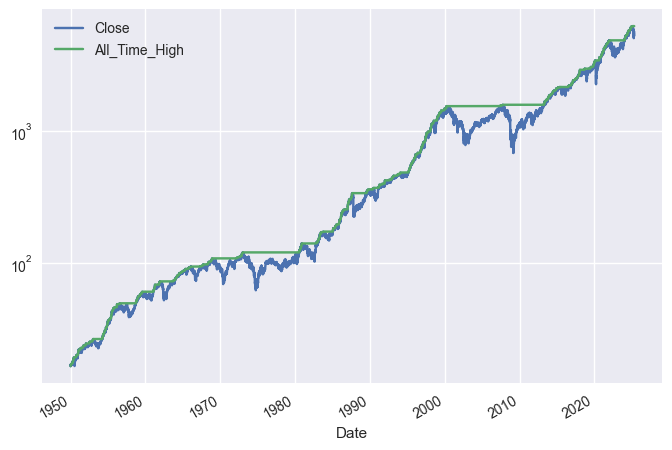

In [220]:
df.plot(logy=True)

In [253]:
# Create a list to store corrections
corrections = []
current_high = df['Close'].iloc[0]
current_high_date = df.index[0]
min_since_high = df['Close'].iloc[0]
min_date = df.index[0]

# We go through the data to find corrections
for date, row in df.iterrows():
    price = row['Close']
    
    # If a new maximum
    if price > current_high:
        # Check if the correction was more than 5%
        drawdown = (current_high - min_since_high) / current_high * 100
        if drawdown > 5:
            duration = (min_date - current_high_date).days 
            corrections.append({
                'High_Date': current_high_date,
                'Low_Date': min_date,
                'High_Price': current_high,
                'Low_Price': min_since_high,
                'Drawdown': drawdown,
                'Duration': duration
            })
        
        # Update the current maximum
        current_high = price
        current_high_date = date
        min_since_high = price
        min_date = date
    
    # Update the minimum if necessary
    elif price < min_since_high:
        min_since_high = price
        min_date = date

# Create a DataFrame with corrections
corrections_df = pd.DataFrame(corrections)

In [251]:
corrections_df.sort_values('Drawdown', ascending=False).head(10)

,High_Date,Low_Date,High_Price,Low_Price,Drawdown,Duration
56,2007-10-09 00:00:00-04:00,2009-03-09 00:00:00-04:00,1565.150024,676.530029,56.775388,517
54,2000-03-24 00:00:00-05:00,2002-10-09 00:00:00-04:00,1527.459961,776.760010,49.146948,928
24,1973-01-11 00:00:00-05:00,1974-10-03 00:00:00-04:00,120.239998,62.279999,48.203593,629
22,1968-11-29 00:00:00-05:00,1970-05-26 00:00:00-04:00,108.370003,69.290001,36.061641,542
65,2020-02-19 00:00:00-05:00,2020-03-23 00:00:00-04:00,3386.149902,2237.399902,33.924960,32
35,1987-08-25 00:00:00-04:00,1987-12-04 00:00:00-05:00,336.769989,223.919998,33.509515,101
15,1961-12-12 00:00:00-05:00,1962-06-26 00:00:00-04:00,72.639999,52.320000,27.973568,195
27,1980-11-28 00:00:00-05:00,1982-08-12 00:00:00-04:00,140.520004,102.419998,27.113582,621
68,2022-01-03 00:00:00-05:00,2022-10-12 00:00:00-04:00,4796.560059,3577.030029,25.425097,281
18,1966-02-09 00:00:00-05:00,1966-10-07 00:00:00-04:00,94.059998,73.199997,22.177335,239


In [252]:
df_durations

,from,to,drop_perc,duration_days
0,2007-10-09,2009-03-09:,56.8%,517
1,2000-03-24,2002-10-09:,49.1%,929
2,1973-01-11,1974-10-03:,48.2%,630
3,1968-11-29,1970-05-26:,36.1%,543
4,2020-02-19,2020-03-23:,33.9%,33
5,1987-08-25,1987-12-04:,33.5%,101
6,1961-12-12,1962-06-26:,28.0%,196
7,1980-11-28,1982-08-12:,27.1%,622
8,2022-01-03,2022-10-12:,25.4%,282
9,1966-02-09,1966-10-07:,22.2%,240


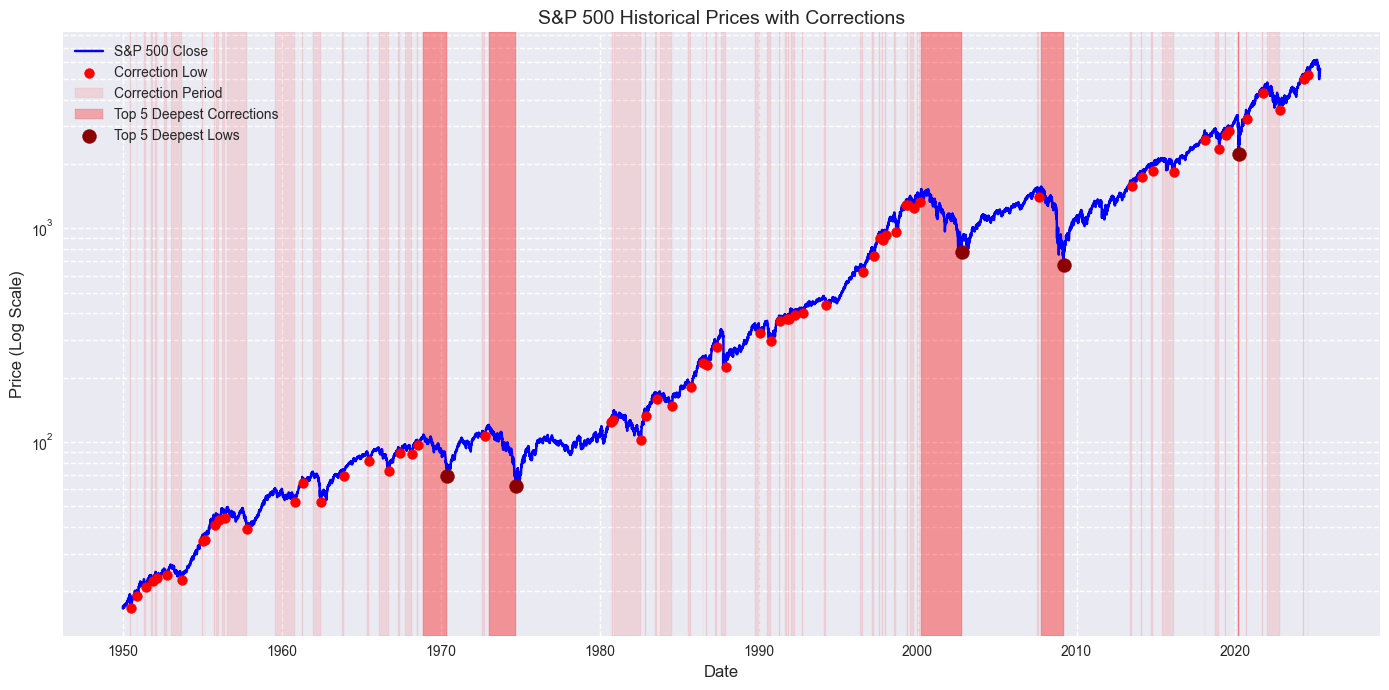

In [247]:
# import matplotlib.pyplot as plt
# import pandas as pd

# Make sure the dates in the DataFrame are in the correct format
df.index = pd.to_datetime(df.index)
corrections_df['High_Date'] = pd.to_datetime(corrections_df['High_Date'])
corrections_df['Low_Date'] = pd.to_datetime(corrections_df['Low_Date'])

# Step 1: Create a logarithmic scale S&P 500 price chart
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='S&P 500 Close', color='blue')
plt.yscale('log')  
plt.title('S&P 500 Historical Prices with Corrections', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--")

# Step 2: Add the minimum points of all corrections
for idx, row in corrections_df.iterrows():
    plt.scatter(row['Low_Date'], row['Low_Price'], color='red', s=50, zorder=5, label='Correction Low' if idx == 0 else "")

# Step 3: Fill all correction areas with red color (translucent fill)
for idx, row in corrections_df.iterrows():
    plt.axvspan(row['High_Date'], row['Low_Date'], color='red', alpha=0.1, label='Correction Period' if idx == 0 else "")

# Step 4: Identify the deepest drawdowns (e.g. top 5 by Drawdown)
top_corrections = corrections_df.sort_values('Drawdown', ascending=False).head(5)
for idx, row in top_corrections.iterrows():
    plt.axvspan(row['High_Date'], row['Low_Date'], color='red', alpha=0.3, label='Top 5 Deepest Corrections' if idx == top_corrections.index[0] else "")
    plt.scatter(row['Low_Date'], row['Low_Price'], color='darkred', s=100, zorder=10, label='Top 5 Deepest Lows' if idx == top_corrections.index[0] else "")

# Step 5: Add a legend (remove duplicate labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=10)

# Step 6: Show the graph
plt.tight_layout()
plt.show()

In [256]:
corrections_df['Drawdown'].describe()

count    71.000000
mean     12.581380
std      11.059898
min       5.002024
25%       6.237556
50%       7.862235
75%      14.019036
max      56.775388
Name: Drawdown, dtype: float64

In [257]:
corrections_df['Duration'].describe()

count     71.000000
mean     112.929577
std      178.898960
min        7.000000
25%       21.500000
50%       39.000000
75%       89.000000
max      928.000000
Name: Duration, dtype: float64

Text(0.5, 0, 'Drawdown, %')

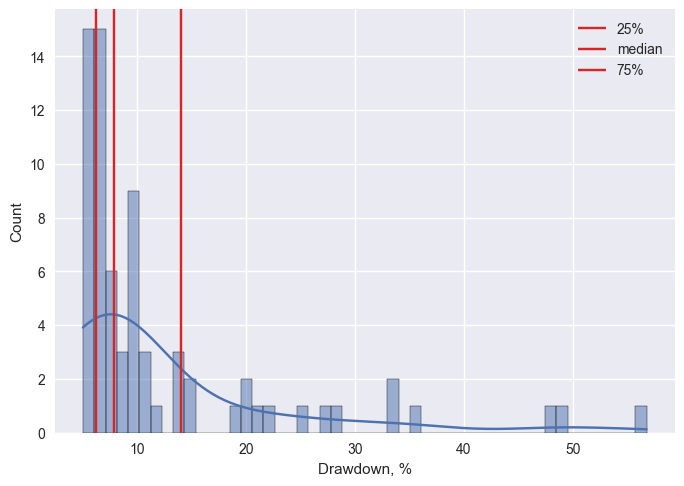

In [291]:
sns.histplot(corrections_df['Drawdown'], bins=50, kde=True)
ylim = plt.ylim()
plt.vlines(np.percentile(corrections_df['Drawdown'], 25), ylim[0], ylim[1], label='25%', colors='tab:red')
plt.vlines(corrections_df['Drawdown'].median(), ylim[0], ylim[1], label='median', colors='tab:red')
plt.vlines(np.percentile(corrections_df['Drawdown'], 75), ylim[0], ylim[1], label='75%', colors='tab:red')
plt.ylim(*ylim)
plt.legend()

plt.xlabel('Drawdown, %')

Text(0.5, 0, 'Duration, days')

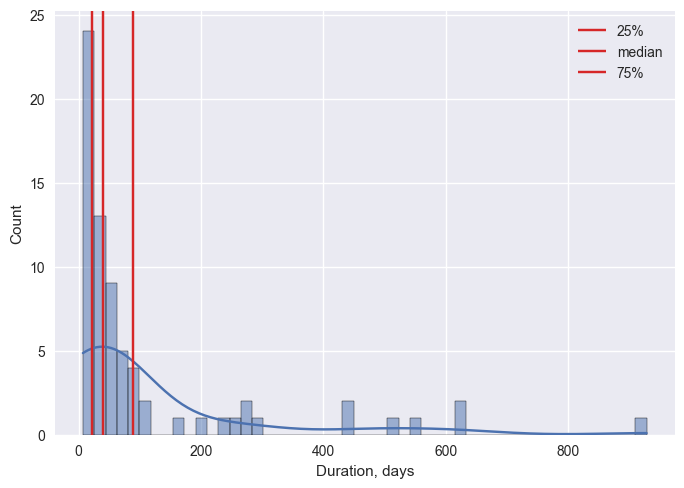

In [292]:
sns.histplot(corrections_df['Duration'], bins=50, kde=True)
ylim = plt.ylim()
plt.vlines(np.percentile(corrections_df['Duration'], 25), ylim[0], ylim[1], label='25%', colors='tab:red')
plt.vlines(corrections_df['Duration'].median(), ylim[0], ylim[1], label='median', colors='tab:red')
plt.vlines(np.percentile(corrections_df['Duration'], 75), ylim[0], ylim[1], label='75%', colors='tab:red')
plt.ylim(*ylim)
plt.legend()

plt.xlabel('Duration, days')

In [293]:
percentiles = corrections_df['Drawdown'].describe()

print("\nCorrection drawdown statistics (in %):")
print(f"25th percentile: {percentiles['25%']:.0f}")
print(f"Median: {percentiles['50%']:.0f}")
print(f"75th percentile: {percentiles['75%']:.0f}")


Correction drawdown statistics (in %):
25th percentile: 6
Median: 8
75th percentile: 14


In [254]:
percentiles = corrections_df['Duration'].describe()

print("\nCorrection duration statistics (in days):")
print(f"25th percentile: {percentiles['25%']:.0f}")
print(f"Median: {percentiles['50%']:.0f}")
print(f"75th percentile: {percentiles['75%']:.0f}")
print(f"\nNumber of corrections: {len(corrections_df)}")

# Sort by size of drop to view largest corrections
print("\nTop 5 largest corrections:")
print(corrections_df.sort_values('Drawdown', ascending=False).head().to_string())


Correction duration statistics (in days):
25th percentile: 22
Median: 39
75th percentile: 89

Number of corrections: 71

Top 5 largest corrections:
                   High_Date                  Low_Date   High_Price    Low_Price   Drawdown  Duration
56 2007-10-09 00:00:00-04:00 2009-03-09 00:00:00-04:00  1565.150024   676.530029  56.775388       517
54 2000-03-24 00:00:00-05:00 2002-10-09 00:00:00-04:00  1527.459961   776.760010  49.146948       928
24 1973-01-11 00:00:00-05:00 1974-10-03 00:00:00-04:00   120.239998    62.279999  48.203593       629
22 1968-11-29 00:00:00-05:00 1970-05-26 00:00:00-04:00   108.370003    69.290001  36.061641       542
65 2020-02-19 00:00:00-05:00 2020-03-23 00:00:00-04:00  3386.149902  2237.399902  33.924960        32


##### **A:** The median duration of significant corrections was 39 days.

### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:
1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS. Make sure you are using the correct delimiter to read the data, such as in this command ```python pandas.read_csv("ha1_Amazon.csv", delimiter=';') ```
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the *return* as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
5. Calculate 2-day percentage changes following positive earnings surprises. Show your answer in % (closest number to the 2nd digit): *return* * 100.0
6. (Optional) Compare the median 2-day percentage change for positive surprises vs. all historical dates. Do you see the difference?

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)

##### Question 4. Median 2-day percentage change in AMZN stock price following positive surprise earnings days (4 points)

* ~~**4.5 (?)**~~
* ~~3.2~~
* ~~2.6~~
* **1.8** 

In [271]:
def try_float(s):
    try:
        return float(s)
    except:
        return np.nan
        
earnings_df = pd.read_csv('./data/ha1_Amazon.csv', delimiter=';').iloc[:-1]
earnings_df['earnings_date'] = pd.to_datetime(earnings_df['Earnings Date'].apply(lambda s: s.split('at')[0]))
earnings_df['surprise_perc'] = earnings_df['Surprise (%)'].apply(try_float)

earnings_df

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),earnings_date,surprise_perc
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-,2026-04-29,NaN
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-,2026-02-04,NaN
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-,2025-10-29,NaN
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-,2025-07-30,NaN
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74,2025-05-01,16.74
...,...,...,...,...,...,...,...,...
111,AMZN,"Amazon.com, Inc.","July 22, 1998 at 12 AM EDT",-,-,+1.34,1998-07-22,1.34
112,AMZN,"Amazon.com, Inc.","April 27, 1998 at 12 AM EDT",-,-,+13.92,1998-04-27,13.92
113,AMZN,"Amazon.com, Inc.","January 22, 1998 at 12 AM EST",-,-,+11.41,1998-01-22,11.41
114,AMZN,"Amazon.com, Inc.","October 27, 1997 at 12 AM EST",-,-,+13.29,1997-10-27,13.29


In [272]:
earnings_df.earnings_date.diff(-1).value_counts()

earnings_date
91 days     49
98 days     21
84 days     16
86 days      5
90 days      4
89 days      3
82 days      2
92 days      2
100 days     2
99 days      2
96 days      2
93 days      2
83 days      1
104 days     1
95 days      1
87 days      1
109 days     1
Name: count, dtype: int64

In [273]:
earnings_df.earnings_date.diff(-1).dt.days.describe()

count    115.000000
mean      91.478261
std        5.154368
min       82.000000
25%       90.000000
50%       91.000000
75%       95.500000
max      109.000000
Name: earnings_date, dtype: float64

In [274]:
earnings_df.surprise_perc.describe()

count     112.000000
mean       52.766339
std       182.031301
min      -191.140000
25%         0.415000
50%        16.135000
75%        60.627500
max      1656.760000
Name: surprise_perc, dtype: float64

Text(0.5, 0, 'Earnings surprise, %')

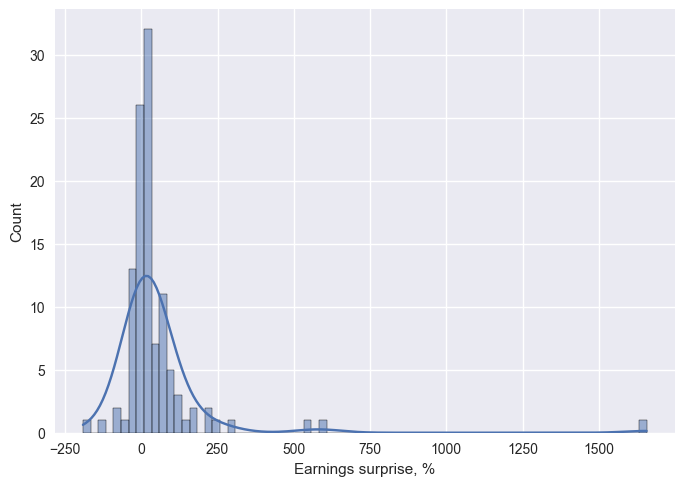

In [275]:
sns.histplot(earnings_df.surprise_perc, kde=True)
plt.xlabel('Earnings surprise, %')

In [276]:
t = 'AMZN'
print(f"Downloading data for ticker {t}...", end='')
ticker = yfinance.Ticker(t)
df = ticker.history( start='1950-01-01', end='2025-05-30' )  
print(' Ok.')

In [277]:
df['date'] = df.index.date

In [278]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,1997-05-15
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,1997-05-16
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,1997-05-19
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,1997-05-20
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,1997-05-21
...,...,...,...,...,...,...,...,...
2025-05-22 00:00:00-04:00,201.380005,205.759995,200.160004,203.100006,38938900,0.0,0.0,2025-05-22
2025-05-23 00:00:00-04:00,198.899994,202.369995,197.850006,200.990005,33393500,0.0,0.0,2025-05-23
2025-05-27 00:00:00-04:00,203.089996,206.690002,202.190002,206.020004,34892000,0.0,0.0,2025-05-27


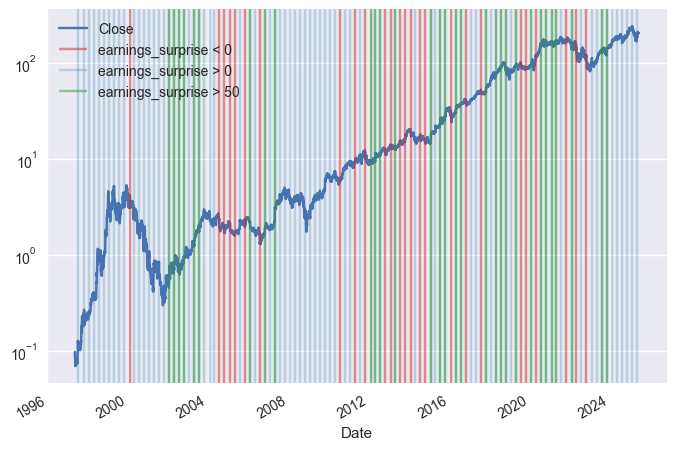

In [279]:
df.Close.plot(logy=True)

plt.vlines(earnings_df.earnings_date[earnings_df.surprise_perc<0].tolist(), *plt.ylim(), colors='tab:red', alpha=0.5, label='earnings_surprise < 0')
plt.vlines(earnings_df.earnings_date[earnings_df.surprise_perc>=0].tolist(), *plt.ylim(), colors='tab:blue', alpha=0.25, label='earnings_surprise > 0')
plt.vlines(earnings_df.earnings_date[earnings_df.surprise_perc>=50].tolist(), *plt.ylim(), colors='tab:green', alpha=0.5, label='earnings_surprise > 50')
plt.legend()

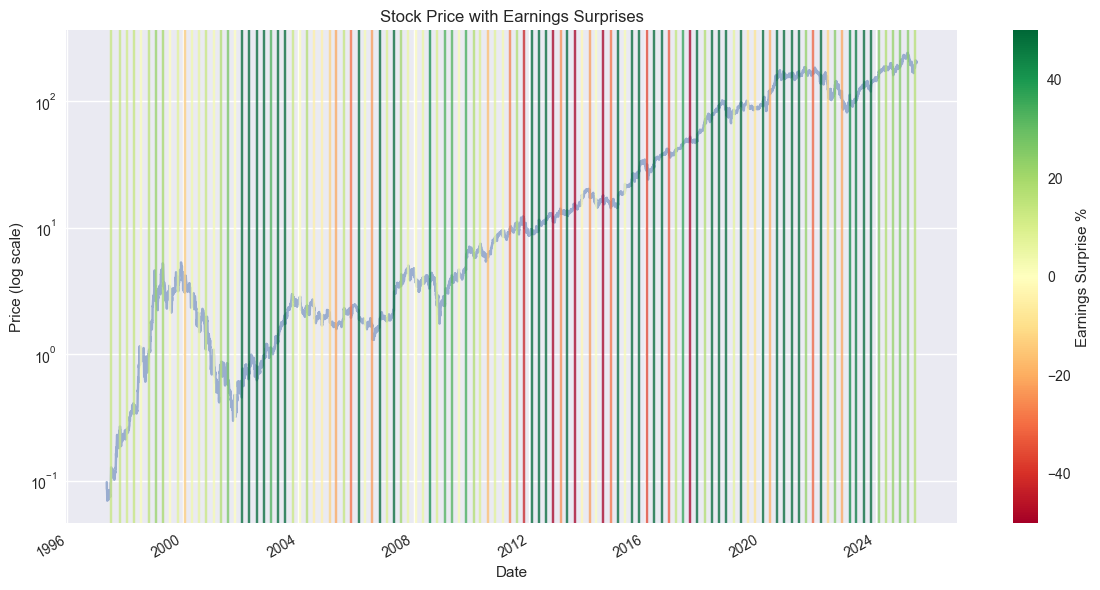

In [280]:
# import matplotlib.pyplot as plt
# import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

df.Close.plot(ax=ax, logy=True, alpha=0.5)

max_abs_surprise = max(abs(earnings_df.surprise_perc.min()), abs(earnings_df.surprise_perc.max()))
#norm = plt.Normalize(-max_abs_surprise, max_abs_surprise)
norm = plt.Normalize(-50, 50)
cmap = plt.cm.RdYlGn  # Red-Yellow-Green colormap

for date, surprise in zip(earnings_df.earnings_date.iloc[4:], earnings_df.surprise_perc.iloc[4:]):
    ax.vlines(date, *ax.get_ylim(), colors=cmap(norm(surprise)), alpha=0.75)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Earnings Surprise %')

ax.set_title('Stock Price with Earnings Surprises')
ax.set_xlabel('Date')
ax.set_ylabel('Price (log scale)')

plt.tight_layout()

In [283]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2025-05-22 00:00:00-04:00,201.380005,205.759995,200.160004,203.100006,38938900,0.0,0.0,2025-05-22
2025-05-23 00:00:00-04:00,198.899994,202.369995,197.850006,200.990005,33393500,0.0,0.0,2025-05-23
2025-05-27 00:00:00-04:00,203.089996,206.690002,202.190002,206.020004,34892000,0.0,0.0,2025-05-27
2025-05-28 00:00:00-04:00,205.919998,207.660004,204.410004,204.720001,28549800,0.0,0.0,2025-05-28
2025-05-29 00:00:00-04:00,208.029999,208.809998,204.229996,205.699997,34700000,0.0,0.0,2025-05-29


In [284]:
earnings_df.tail()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),earnings_date,surprise_perc
111,AMZN,"Amazon.com, Inc.","July 22, 1998 at 12 AM EDT",-,-,+1.34,1998-07-22,1.34
112,AMZN,"Amazon.com, Inc.","April 27, 1998 at 12 AM EDT",-,-,+13.92,1998-04-27,13.92
113,AMZN,"Amazon.com, Inc.","January 22, 1998 at 12 AM EST",-,-,+11.41,1998-01-22,11.41
114,AMZN,"Amazon.com, Inc.","October 27, 1997 at 12 AM EST",-,-,+13.29,1997-10-27,13.29
115,AMZN,"Amazon.com, Inc.","July 10, 1997 at 12 AM EDT",-,-,+13.33,1997-07-10,13.33


In [285]:
df['day_2_change_perc'] = df.Close.shift(-1)/df.Close.shift(1) - 1

<Axes: xlabel='day_2_change_perc', ylabel='Count'>

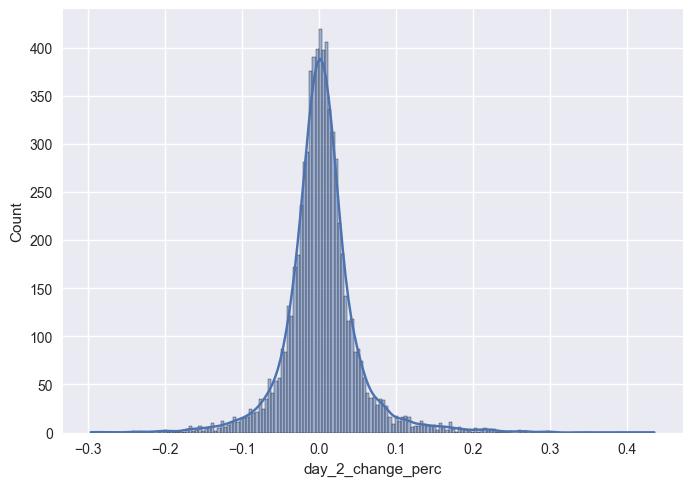

In [286]:
sns.histplot(df['day_2_change_perc'], kde=True)

In [287]:
def try_list0(lst):
    try: return lst[0]
    except: return np.nan

earnings_df['day_2_change_perc'] = earnings_df['earnings_date'].dt.date.apply(lambda d: try_list0(df[df['date']==d]['day_2_change_perc'].values))
earnings_df['day_2_change_perc']

0           NaN
1           NaN
2           NaN
3           NaN
4      0.030149
         ...   
111   -0.033601
112    0.126658
113   -0.026695
114   -0.015543
115   -0.013457
Name: day_2_change_perc, Length: 116, dtype: float64

In [318]:
earnings_df.tail()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),earnings_date,surprise_perc,day_2_change_perc
111,AMZN,"Amazon.com, Inc.","July 22, 1998 at 12 AM EDT",-,-,+1.34,1998-07-22,1.34,-0.033601
112,AMZN,"Amazon.com, Inc.","April 27, 1998 at 12 AM EDT",-,-,+13.92,1998-04-27,13.92,0.126658
113,AMZN,"Amazon.com, Inc.","January 22, 1998 at 12 AM EST",-,-,+11.41,1998-01-22,11.41,-0.026695
114,AMZN,"Amazon.com, Inc.","October 27, 1997 at 12 AM EST",-,-,+13.29,1997-10-27,13.29,-0.015543
115,AMZN,"Amazon.com, Inc.","July 10, 1997 at 12 AM EDT",-,-,+13.33,1997-07-10,13.33,-0.013457


<Axes: xlabel='surprise_perc', ylabel='day_2_change_perc'>

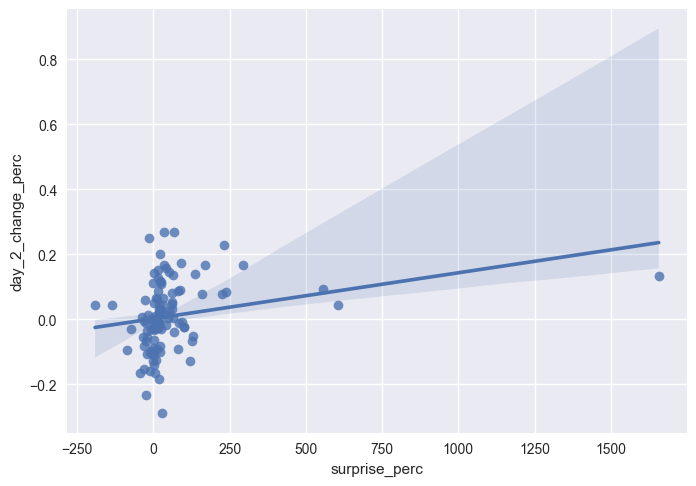

In [289]:
sns.regplot(earnings_df, x='surprise_perc', y='day_2_change_perc')

<Axes: xlabel='surprise_perc', ylabel='day_2_change_perc'>

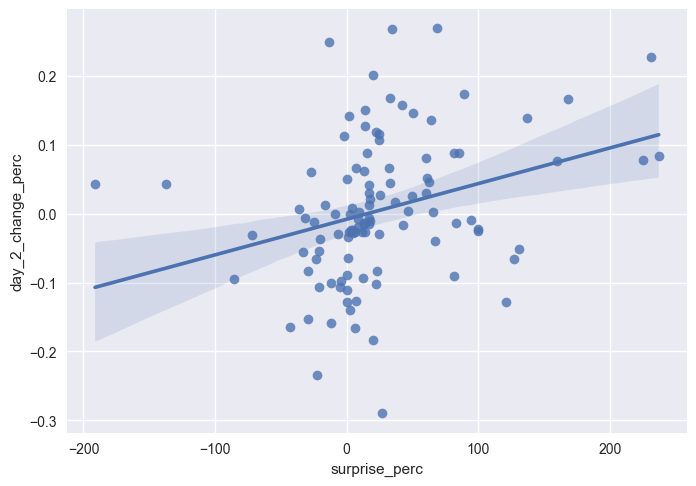

In [290]:
sns.regplot(earnings_df[earnings_df.surprise_perc<250], x='surprise_perc', y='day_2_change_perc')

In [316]:
sklearn.metrics.r2_score(earnings_df['surprise_perc'].fillna(0), earnings_df['day_2_change_perc'].fillna(0)), \
np.corrcoef(earnings_df['surprise_perc'].fillna(0), earnings_df['day_2_change_perc'].fillna(0))[0,1], \
earnings_df[['surprise_perc', 'day_2_change_perc']].fillna(0).corr('kendall').values[0,1]

(-0.08131231513446968, 0.24740799980045247, 0.30201142159515093)

In [317]:
x_ = earnings_df[['surprise_perc', 'day_2_change_perc']][earnings_df.surprise_perc<250].dropna()
sklearn.metrics.r2_score(x_['surprise_perc'], x_['day_2_change_perc']), \
\
np.corrcoef(x_['surprise_perc'], x_['day_2_change_perc'])[0,1], \
x_.corr('kendall').values[0,1]

(-0.1752552784824113, 0.3087355654640322, 0.2852197992384908)

##### A small correlation (up to 0.3) was found between the surprise earnings percentage and the 2-day price change.

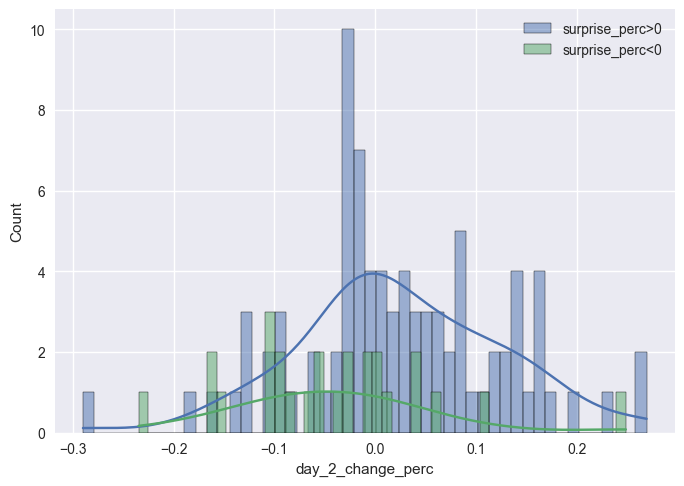

In [298]:
sns.histplot(earnings_df[earnings_df['surprise_perc']>0]['day_2_change_perc'], bins=50, kde=True, label='surprise_perc>0')
sns.histplot(earnings_df[earnings_df['surprise_perc']<0]['day_2_change_perc'], bins=50, kde=True, label='surprise_perc<0')
plt.legend()

In [296]:
earnings_df.groupby(earnings_df['surprise_perc']>0)[['day_2_change_perc']].agg(['describe'])

day_2_change_perc                                          \
                       describe                                           
                          count      mean       std       min       25%   
surprise_perc                                                             
False                      26.0 -0.040989  0.098175 -0.234625 -0.099819   
True                       86.0  0.024086  0.101582 -0.289753 -0.026574   

                                             
                                             
                    50%       75%       max  
surprise_perc                                
False         -0.045255  0.004574  0.248378  
True           0.010405  0.087543  0.268930

In [297]:
earnings_df[earnings_df['surprise_perc']>0]['day_2_change_perc'].median() *100

1.0405227919253135

In [301]:
earnings_df[earnings_df['surprise_perc']<0]['day_2_change_perc'].median() *100

-4.525466419035807

In [300]:
earnings_df['day_2_change_perc'].median() * 100

-0.3194844634543059

##### Question 4. Median 2-day percentage change in AMZN stock price following positive surprise earnings days (4 points)
* ~~**4.5 (?)**~~
* ~~3.2~~
* ~~2.6~~
* **1.8** 

<p>
<strong>
    
*A:* The answer was that the median 2-day price change after a positive earing surprise was 1.04%.
This answer option is not in the list. The closest answer option is 1.8%.

</strong>
</p>

<p>
<strong>
However, the list of answer options also includes the option 4.5%.
I got a similar value of -4.5% for the 2-day price drop after a negative earing surprise.
Perhaps this value was required to be found in the task?
</strong>
</p>

### Question 5.  [Exploratory, optional] Brainstorm potential idea for your capstone project

**Free text answer**

Describe the capstone project you would like to pursue, considering your aspirations, ML model predictions, and prior knowledge. Even if you are unsure at this stage, try to generate an idea you would like to explore-such as a specific asset class, country, industry vertical, or investment strategy. Be as specific as possible.

*Example: I want to build a short-term prediction model for the US/India/Brazil stock markets, focusing on the largest stocks over a 30-day investment horizon. I plan to use RSI and MACD technical indicators and news coverage data to generate predictions.*

<p>
<em>
<strong>
At this stage, I have not made a decision yet. A possible option is to generate a large set of features based on technical analysis indicators,
as well as simple features characterizing time series. And then build an ML predictive model for the classification task
predicting market behavior N trading periods ahead. Most likely, such a model will be able to work on short-term time periods (minutes)
on the forex market, on cryptocurrencies, on stock futures. But it is unknown whether the exchange commission will be covered.
It is also possible that such a model could work on daily periods in the stock market, where there are long-term trends.
Perhaps, in this case, adding macroeconomic and fundamental data will be useful.
</strong>
</em>
</p>

<p>
<em>
<strong>
It may also be worthwhile to first analyze the correlations of prices of various trading assets with macroeconomic and fundamental data.
Perhaps, some of them will show greater correlation, and greater potential for use in such trading strategies.
</strong>
</em>
</p>

### Question 6. [Exploratory, optional] Investigate new metrics

**Free text answer**

Using the data sources we have covered (or any others you find relevant), download and explore a few additional metrics or time series that could be valuable for your project. Briefly explain why you think each metric is useful. This does not need to be a comprehensive list-focus on demonstrating your ability to generate data requests based on your project description, identify and locate the necessary data, and explain how you would retrieve it using Python.


**I have an idea to download 60+ macroeconomic indicators from the article "Macroeconomic Indicators Affecting Stock Market"
and analyze the correlation with gold, oil, commodities, currencies and indices**

https://pythoninvest.com/long-read/macro-indicators-affecting-stock-market

## Submitting the solutions

Form for submitting: https://courses.datatalks.club/sma-zoomcamp-2025/homework/hw01

---
## Leaderboard

Leaderboard link: https://courses.datatalks.club/sma-zoomcamp-2025/leaderboard